In [34]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [35]:
np.random.seed(42)
tf.random.set_seed(42)

IMAGE_SIZE = (128, 128)
BATCH_SIZE = 32
EPOCHS = 10


In [36]:
def load_and_preprocess_data(data_dir):
    datagen = ImageDataGenerator( rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

    train_generator = datagen.flow_from_directory(
        data_dir,
        target_size=IMAGE_SIZE,
        batch_size=BATCH_SIZE,
        class_mode='categorical',
        subset='training'
    )

    validation_generator = datagen.flow_from_directory(
        data_dir,
        target_size=IMAGE_SIZE,
        batch_size=BATCH_SIZE,
        class_mode='categorical',
        subset='validation'
    )

    return train_generator, validation_generator


In [37]:
def create_improved_model(num_classes):
    model = models.Sequential()
    
    # Couches Convolutionnelles
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
    model.add(layers.MaxPooling2D((2, 2)))
    
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    
    # Aplatir les données pour les couches Dense
    model.add(layers.Flatten())
    
    # Couches Denses avec Dropout
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dropout(0.5))  # Ajout de dropout
    
    model.add(layers.Dense(num_classes, activation='softmax'))
    
    # Compiler le modèle avec un optimiseur différent
    model.compile(optimizer='Adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model

In [38]:
data_dir = r'C:\Users\elkha\Downloads\archive\train\03'
train_generator, validation_generator = load_and_preprocess_data(data_dir)

num_classes = len(train_generator.class_indices)

model = create_model(num_classes)

history = model.fit(
    train_generator,
    epochs=EPOCHS,
    validation_data=validation_generator,
 
)



Found 1600 images belonging to 10 classes.
Found 400 images belonging to 10 classes.
Epoch 1/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 53s 975ms/step - accuracy: 0.1205 - loss: 2.2953 - val_accuracy: 0.2550 - val_loss: 2.0385
Epoch 2/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 49s 936ms/step - accuracy: 0.3553 - loss: 1.7041 - val_accuracy: 0.6450 - val_loss: 1.0840
Epoch 3/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 50s 961ms/step - accuracy: 0.6473 - loss: 0.9911 - val_accuracy: 0.7750 - val_loss: 0.5872
Epoch 4/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 50s 968ms/step - accuracy: 0.8269 - loss: 0.5120 - val_accuracy: 0.8675 - val_loss: 0.4551
Epoch 5/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 50s 952ms/step - accuracy: 0.8889 - loss: 0.3413 - val_accuracy: 0.8700 - val_loss: 0.3745
Epoch 6/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 50s 957ms/step - accuracy: 0.9324 - loss: 0.2392 - val_accuracy: 0.9025 - val_loss: 0.3258
Epoch 7/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 51s 985ms/step - accuracy: 0.9441 - loss: 0.1735 - val_accuracy: 0.9400 - val_loss: 0.2693
Epoch 8/10
5

In [39]:
model.save(r'C:\Users\elkha\Downloads\handgesture_model.keras')



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


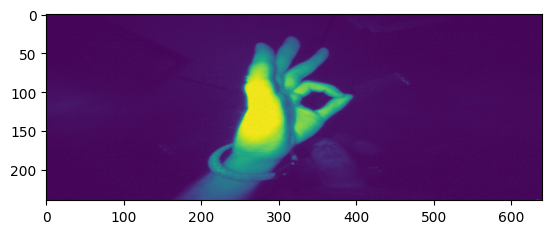

The predicted hand gesture is: ok


In [51]:
import numpy as np
from tensorflow.keras.preprocessing import image
from skimage.io import imread
import matplotlib.pyplot as plt

model = tf.keras.models.load_model(r'C:\Users\elkha\Downloads\handgesture_model.keras')

def predict_hand_gesture(image_path):
    img = image.load_img(image_path, target_size=IMAGE_SIZE)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0

    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction)

    class_labels = list([key.split('_')[1] for key in train_generator.class_indices.keys()])
    predicted_gesture = class_labels[predicted_class]

    return predicted_gesture

image_path_to_predict = r'C:\Users\elkha\Downloads\test\08\07_ok\frame_08_07_0001.png'
predicted_gesture = predict_hand_gesture(image_path_to_predict)

img=imread(image_path_to_predict)
plt.imshow(img)
plt.show()

print(f"The predicted hand gesture is: {predicted_gesture}")
     